In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [2]:
color=sns.color_palette()

In [4]:
warnings.filterwarnings('ignore')

In [5]:
Default=pd.read_csv('default.csv')

In [6]:
Default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [8]:
Default=Default[['Employed','Bank Balance','Annual Salary','Defaulted?']]

In [9]:
Default.columns=['student','balance','income','default']

In [10]:
Default.tail()

,student,balance,income,default
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0
9999,0,2411.04,202355.40,0


In [11]:
Default.describe()

,student,balance,income,default
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


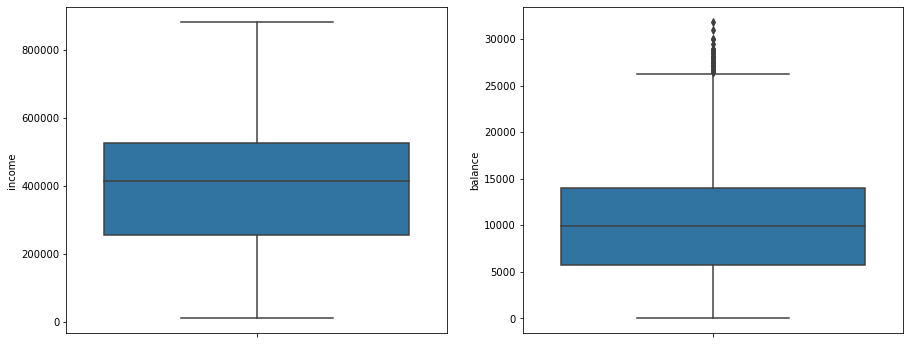

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y='income',data=Default)
plt.subplot(1,2,2)
sns.boxplot(y='balance',data=Default)
plt.show()

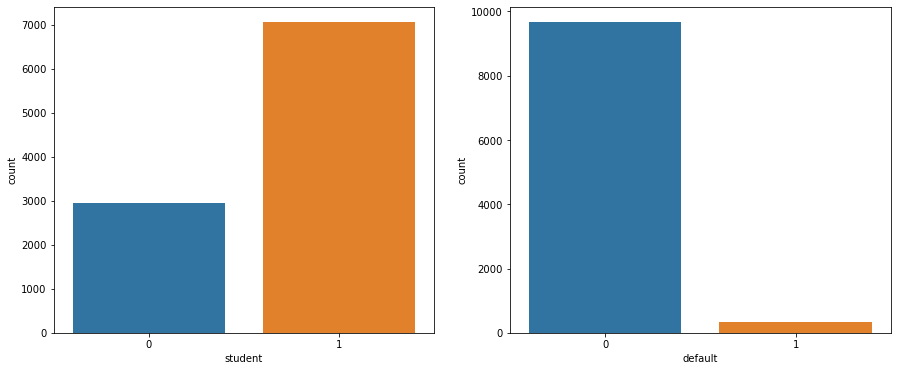

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot('student',data=Default)
plt.subplot(1,2,2)
sns.countplot('default',data=Default)
plt.show()

In [20]:
Default['student'].value_counts()

1    7056
0    2944
Name: student, dtype: int64

In [21]:
Default['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [22]:
Default['student'].value_counts(normalize=True).round(2)

1    0.71
0    0.29
Name: student, dtype: float64

In [23]:
Default['default'].value_counts(normalize=True).round(3)

0    0.967
1    0.033
Name: default, dtype: float64

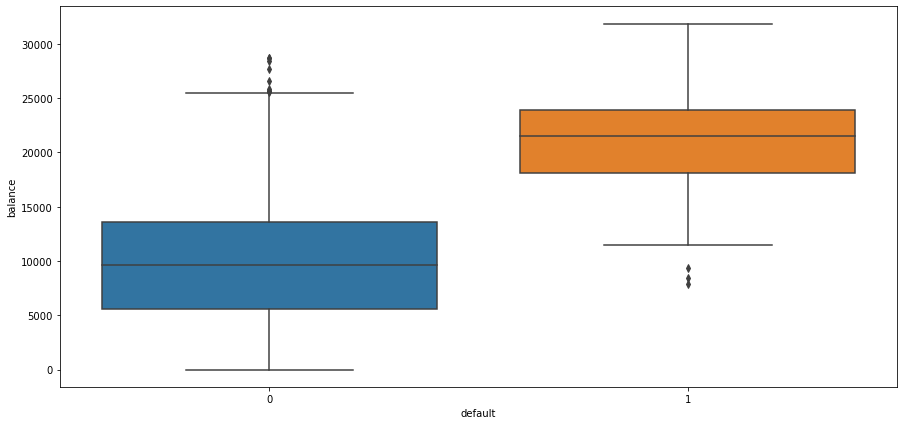

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x='default',y='balance',data=Default)
plt.show()

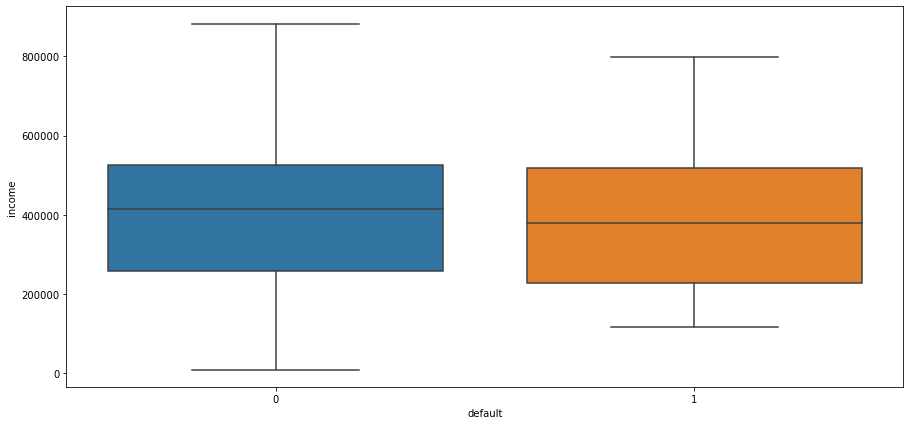

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x='default',y='income',data=Default)
plt.show()

In [37]:
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)

default,0,1
student,,
0,0.96,0.04
1,0.97,0.03


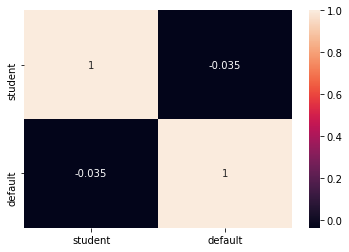

In [43]:
sns.heatmap(Default[['student','default']].corr(),annot=True)
plt.show()

In [46]:
Default.isnull().sum()

student    0
balance    0
income     0
default    0
dtype: int64

In [69]:
Q3,Q1=Default['balance'].quantile([0.75,0.25])

In [70]:
Q3

13995.66

In [71]:
Q1

5780.79

In [72]:
IQR=Q3-Q1

In [73]:
IQR

8214.869999999999

In [74]:
UL=Q3+1.5*IQR

In [75]:
UL

26317.964999999997

In [76]:
Default['balance'].max()

31851.84

In [77]:
LL=Q1-1.5*(IQR)

In [78]:
LL

-6541.5149999999985

In [79]:
df=Default[Default['balance']>UL]

In [80]:
df.count()

student    31
balance    31
income     31
default    31
dtype: int64

In [81]:
df['default'].value_counts()

1    26
0     5
Name: default, dtype: int64

In [82]:
df['default'].value_counts(normalize=True).round(2)

1    0.84
0    0.16
Name: default, dtype: float64

In [83]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

In [85]:
df.value_counts('default')

default
1    26
0     5
dtype: int64

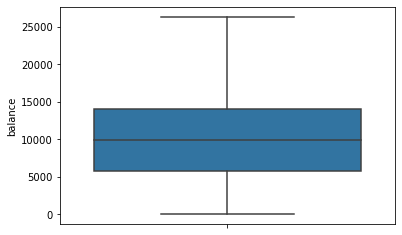

In [90]:
sns.boxplot(y='balance',data=Default)
plt.show()

In [93]:
# ******************Applying logistic regression algorithm**********************

In [94]:
x=Default.drop('default',axis=1)

In [95]:
y=Default[['default']]

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=21)

In [99]:
x_train.shape

(7000, 3)

In [100]:
x_test.shape

(3000, 3)

In [105]:
y_train.value_counts(normalize=True).round(2)

default
0          0.97
1          0.03
dtype: float64

In [106]:
y_test.value_counts(normalize=True).round(2)

default
0          0.97
1          0.03
dtype: float64

In [107]:
Default.value_counts('default',normalize=True).round(2)

default
0    0.97
1    0.03
dtype: float64

In [113]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=33,sampling_strategy=0.75)

In [114]:
sm

SMOTE(random_state=33, sampling_strategy=0.75)

In [119]:
x_res,y_res=sm.fit_resample(x_train,y_train)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
lr=LogisticRegression()

In [122]:
lr.fit(x_res,y_res)

LogisticRegression()

In [123]:
y_pred=lr.predict(x_test)

In [124]:
type(y_pred)

numpy.ndarray

In [125]:
y_pred.shape

(3000,)

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

In [132]:
confusion_matrix(y_test,y_pred)

array([[2103,  797],
       [  28,   72]], dtype=int64)

In [133]:
accuracy=((2103+72)/3000)

In [134]:
accuracy

0.725